# Analyse Exploratoire des Données Agricoles
Ce notebook effectue une analyse exploratoire des données pour mieux comprendre les relations entre les différentes variables.

In [2]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [3]:
# Charger les données
data_path = "../data/final_data.csv"  # Exemple de chemin
data = pd.read_csv(data_path)

# Afficher les premières lignes des données
print(data.head())

         date parcelle_id  latitude_x  longitude_x culture_x   ndvi   lai  \
0  2020-01-01        P001    33.85339    -5.515999    sol_nu  0.181  0.15   
1  2020-01-02        P001    33.85339    -5.515999    sol_nu  0.190  0.26   
2  2020-01-03        P001    33.85339    -5.515999    sol_nu  0.164  0.21   
3  2020-01-04        P001    33.85339    -5.515999    sol_nu  0.178  0.20   
4  2020-01-05        P001    33.85339    -5.515999    sol_nu  0.140  0.18   

   stress_hydrique  biomasse_estimee  temperature  ...   ph  \
0              0.0               0.0         8.14  ...  7.9   
1              0.0               0.0         8.30  ...  7.9   
2              0.0               0.0         9.04  ...  7.9   
3              0.0               0.0         6.68  ...  7.9   
4              0.0               0.0         7.43  ...  7.9   

   matiere_organique  azote  phosphore  potassium  culture_y  \
0               3.62  0.254       46.0      255.8        NaN   
1               3.62  0.254   

In [6]:
# Vérification des valeurs manquantes
print(data.isnull().sum())

date                          0
parcelle_id                   0
latitude_x                    0
longitude_x                   0
culture_x                     0
ndvi                          0
lai                           0
stress_hydrique               0
biomasse_estimee              0
temperature                   0
humidite                      0
precipitation                 0
rayonnement_solaire           0
vitesse_vent                  0
direction_vent                0
latitude_y                    0
longitude_y                   0
type_sol                      0
surface_ha                    0
capacite_retention_eau        0
ph                            0
matiere_organique             0
azote                         0
phosphore                     0
potassium                     0
culture_y                 88350
rendement_estime          88350
rendement_final           88350
progression               88350
risk_metric                   0
dtype: int64


In [10]:
# Remplacement des NaN par la moyenne pour chaque colonne concernée
data['rendement_estime'] = data['rendement_estime'].fillna(data['rendement_estime'].mean())
data['rendement_final'] = data['rendement_final'].fillna(data['rendement_final'].mean())
data['progression'] = data['progression'].fillna(data['progression'].mean())
# Verifizcation des colonnes qu'elles ne contiennent pas des valeurs NAN
print(data[['rendement_estime', 'rendement_final', 'progression']].isnull().sum())

rendement_estime    0
rendement_final     0
progression         0
dtype: int64


In [11]:
# Aperçu des données
print(data.info())
print(data.describe())

# Vérification des valeurs manquantes
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91350 entries, 0 to 91349
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    91350 non-null  object 
 1   parcelle_id             91350 non-null  object 
 2   latitude_x              91350 non-null  float64
 3   longitude_x             91350 non-null  float64
 4   culture_x               91350 non-null  object 
 5   ndvi                    91350 non-null  float64
 6   lai                     91350 non-null  float64
 7   stress_hydrique         91350 non-null  float64
 8   biomasse_estimee        91350 non-null  float64
 9   temperature             91350 non-null  float64
 10  humidite                91350 non-null  float64
 11  precipitation           91350 non-null  float64
 12  rayonnement_solaire     91350 non-null  float64
 13  vitesse_vent            91350 non-null  float64
 14  direction_vent          91350 non-null

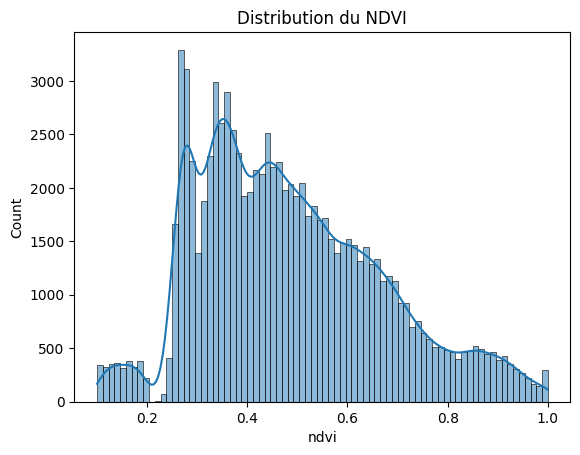

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution de NDVI
sns.histplot(data['ndvi'], kde=True)
plt.title("Distribution du NDVI")
plt.show()

cette distribution fournit un aperçu global de la végétation et peut être utilisée pour planifier des interventions agricoles ou surveiller la santé des cultures à grande échelle.

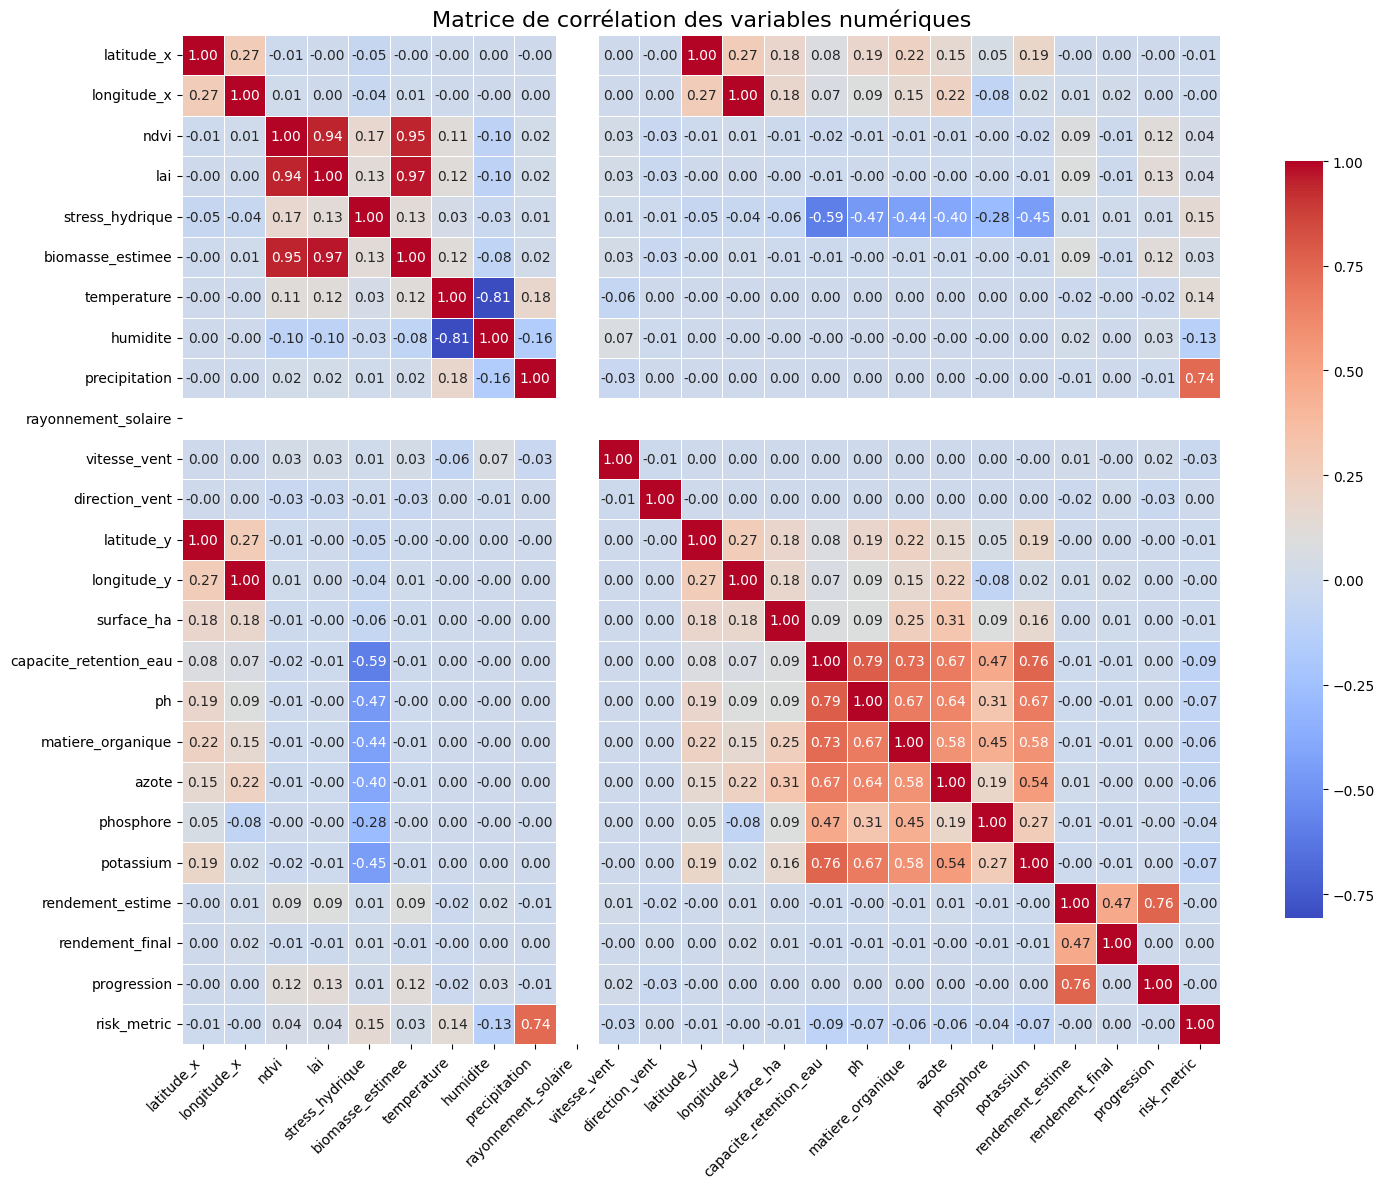

Colonnes utilisées pour la matrice de corrélation :
Index(['latitude_x', 'longitude_x', 'ndvi', 'lai', 'stress_hydrique',
       'biomasse_estimee', 'temperature', 'humidite', 'precipitation',
       'rayonnement_solaire', 'vitesse_vent', 'direction_vent', 'latitude_y',
       'longitude_y', 'surface_ha', 'capacite_retention_eau', 'ph',
       'matiere_organique', 'azote', 'phosphore', 'potassium',
       'rendement_estime', 'rendement_final', 'progression', 'risk_metric'],
      dtype='object')


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrer uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Créer la matrice de corrélation
corr_matrix = numeric_data.corr()

# Ajuster la taille de la figure et l'espacement des étiquettes
plt.figure(figsize=(15, 12))  # Augmenter la taille de la figure

# Tracer la matrice de corrélation
sns.heatmap(
    corr_matrix,
    annot=True,          # Ajouter les annotations
    fmt=".2f",           # Garder deux décimales
    cmap="coolwarm",     # Choisir une palette de couleurs
    linewidths=0.5,      # Ajouter des séparations entre les cellules
    cbar_kws={'shrink': 0.75}  # Réduire la taille de la barre des couleurs
)

# Ajuster les étiquettes pour éviter qu'elles se chevauchent
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotation des étiquettes en abscisse
plt.yticks(fontsize=10)                           # Taille des étiquettes en ordonnée
plt.title("Matrice de corrélation des variables numériques", fontsize=16)  # Titre de la matrice
plt.tight_layout()  # Ajuster l'espacement automatiquement
plt.show()

print("Colonnes utilisées pour la matrice de corrélation :")
print(numeric_data.columns)


La matrice de corrélation présentée ci-dessus fournit une vue d'ensemble des relations entre les différentes variables numériques présentes dans le jeu de données. Les valeurs de corrélation vont de -1 à 1 :
1 indique une corrélation positive parfaite (les deux variables augmentent ensemble).
0 indique aucune corrélation.
-1 indique une corrélation négative parfaite (une variable augmente pendant que l'autre diminue).

Les résultats peuvent être utilisés pour identifier les facteurs les plus influents et orienter les décisions stratégiques, comme l'amélioration des sols ou l'ajustement des pratiques d'irrigation.

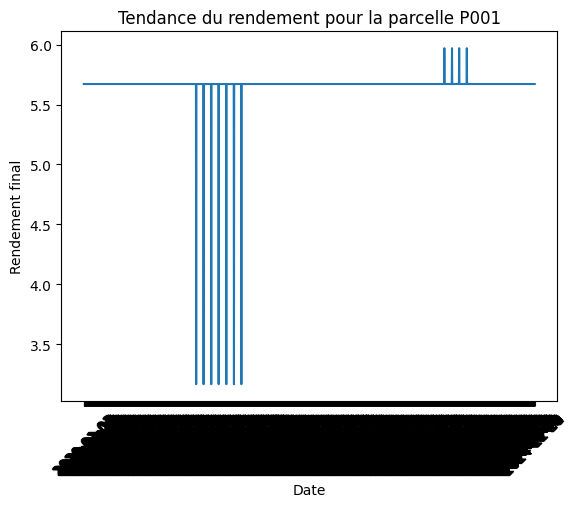

In [19]:
parcelle_id = 'P001'
data_parcelle = data[data['parcelle_id'] == parcelle_id]
plt.plot(data_parcelle['date'], data_parcelle['rendement_final'])
plt.title(f"Tendance du rendement pour la parcelle {parcelle_id}")
plt.xlabel("Date")
plt.ylabel("Rendement final")
plt.xticks(rotation=45)
plt.show()

- Une majorité des rendements affichent une valeur constante autour de 5,5 tonnes/ha, indiquant une stabilité dans les performances agricoles pour cette parcelle sur la période analysée.
- Cependant, des fluctuations occasionnelles sont observées, notamment une baisse significative autour de 3,5 tonnes/ha pour une série de dates rapprochées.

Le graphique met en évidence une stabilité générale des rendements, mais il révèle également des périodes de fluctuations qui méritent une analyse approfondie. Ces informations pourraient guider les efforts d'amélioration des pratiques agricoles pour la parcelle P001.

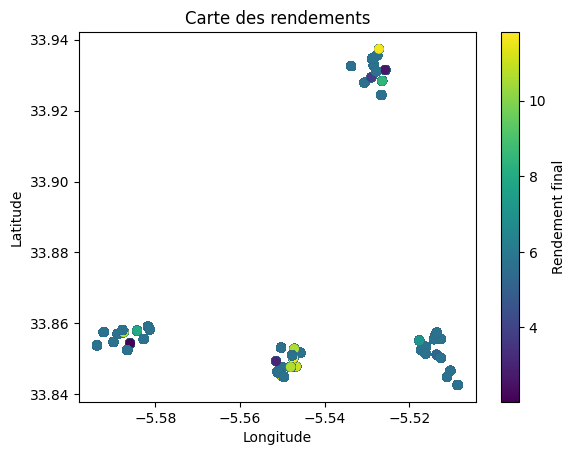

In [21]:
plt.scatter(data['longitude_x'], data['latitude_x'], c=data['rendement_final'], cmap='viridis')
plt.colorbar(label='Rendement final')
plt.title("Carte des rendements")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

- Les points les plus clairs (teintes proches du jaune) représentent les rendements les plus élevés (supérieurs à 10 tonnes/ha), tandis que les teintes sombres (violet) indiquent les rendements les plus faibles (autour de 4 tonnes/ha).
- Les rendements les plus élevés semblent concentrés dans un cluster spécifique, situé approximativement autour des coordonnées latitude ~33.92 et longitude ~-5.54.

La carte des rendements fournit une vue claire de la répartition géographique des performances agricoles. Les clusters identifiés et les variations de rendement au sein de ceux-ci offrent une base pour une analyse ciblée des facteurs influençant les résultats agricoles.

Cette carte présente la localisation des parcelles agricoles sur un fond géographique détaillé, offrant un contexte spatial clair des rendements agricoles dans la région de Meknès et ses environs.

Les clusters principaux se trouvent :
- Au nord de la ville de Meknès, dans une zone proche de Dkhissa.
- Dans le centre et au sud de Meknès, autour des quartiers comme Marjane, Sidi Bouzekri, et à proximité de la RN13.